# Unsupervised learning - dimensionality reduction
## Principal component analysis PCA

Follow:
- _Introduction to Machine Learning_ [Chapter 3](https://github.com/amueller/introduction_to_ml_with_python/blob/master/03-unsupervised-learning.ipynb) **Section 3.4.1 Principal Component Analysis** (p.142-149)
- _Python Data Science Handbook_ [Chapter 5 In Depth: Principal Components Analysis](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb) (p.433-436)






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mglearn

## Introduction to PCA

Principal component analysis is a dimensionality reduction method that projects data onto axes preserving highest variance of the data. Projection onto these axis results in creating new features from linear combinations of the original features. The weights are the principal component axis (loadings), the projected features are the principal components (scores)

<div class="alert alert-block alert-warning">
Termininology is vast
</div>

Term overview:  

| Text | sklearn | statistics | other | 
| --- | --- | --- | ---|
| Principal (component) axes| `pca.components_` |loadings | eigenvectors of the covariance matrix|
| Explained variance |`pca.explained_variance_`| variance explained |eigenvalues of the covariance matrix|
| Explained variance ratio |`pca.explained_variance_ratio_`| proportion of variance explained ||
| Principal components | `pca.transform(X)`| scores| transformed/projected features|



We will follow code from Python Data Science Handbook Chapter 5:[Principal Component Analysis](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb)

Text(0, 0.5, 'X2')

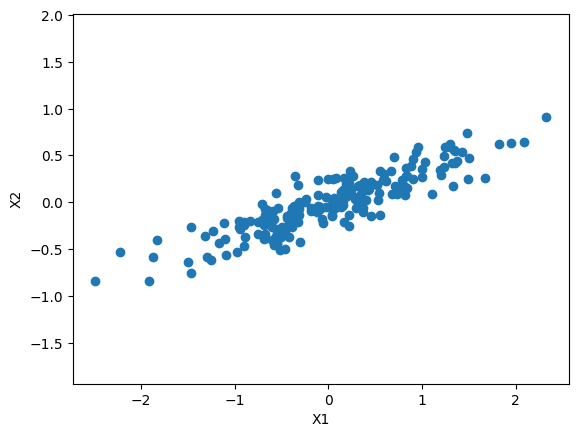

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
plt.xlabel('X1')
plt.ylabel('X2')

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Rows in `components_` are the principal component axes. Shape is (n_components, n_features)

In [5]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


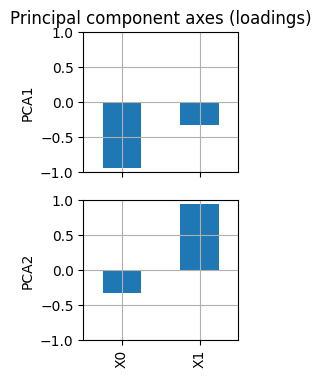

In [6]:
p_components = pd.DataFrame(pca.components_, columns=['X0', 'X1'])
f, axs = plt.subplots(p_components.shape[0], 1, figsize=(2,4),sharex=True)
for i, ax in enumerate(axs):
    p_components.loc[i,:].plot.bar(ax=ax)
    ax.set_ylabel('PCA{}'.format(i+1))
    ax.set_ylim([-1,1])
    ax.grid(True)
axs[0].set_title('Principal component axes (loadings)');

Attribute `explained_variance_` contains the amount of explained variance by each component

In [7]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


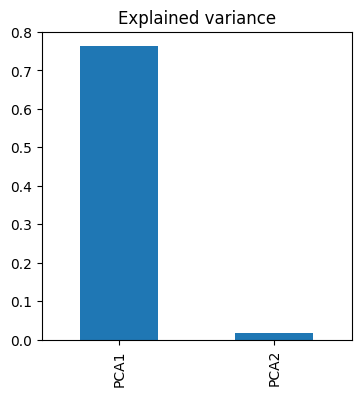

In [8]:
ax = pd.DataFrame(pca.explained_variance_, index=['PCA1', 'PCA2']).plot.bar(legend=False, figsize=(4,4))
ax.set_title('Explained variance');

Attribute `explained_variance_ratio_` contains the proportion of variance explained by each component

In [9]:
print(pca.explained_variance_ratio_)

[0.97634101 0.02365899]


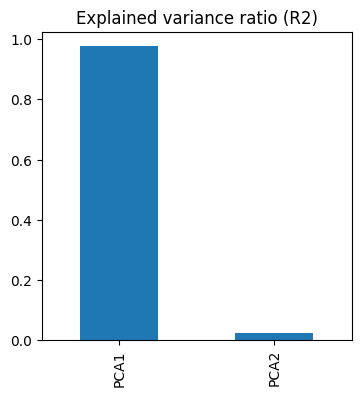

In [10]:
ax = pd.DataFrame(pca.explained_variance_ratio_, index=['PCA1', 'PCA2']).plot.bar(legend=False, figsize=(4,4))
ax.set_title('Explained variance ratio (R2)');

### Visualizing component axes with length proportional to explained variance

PCA finds an axis where variance is maximum. Then, a perpendicular distance with the next maximum variance and so on. In 2D, there are only two axes to be found

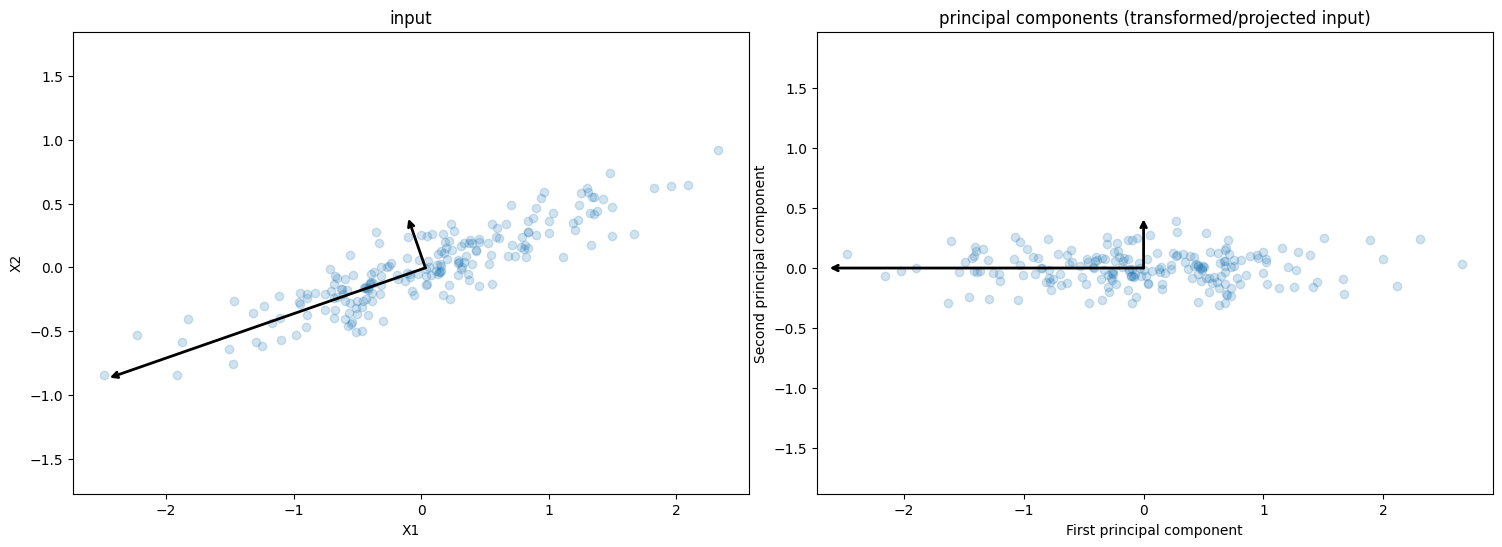

In [11]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='X1', ylabel='X2', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3*np.sqrt(pca.explained_variance_[1])], ax=ax[1])
draw_vector([0, 0], [-3*np.sqrt(pca.explained_variance_[0]), 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='First principal component', ylabel='Second principal component',
          title='principal components (transformed/projected input)');


### Transforming data between representations

In [12]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


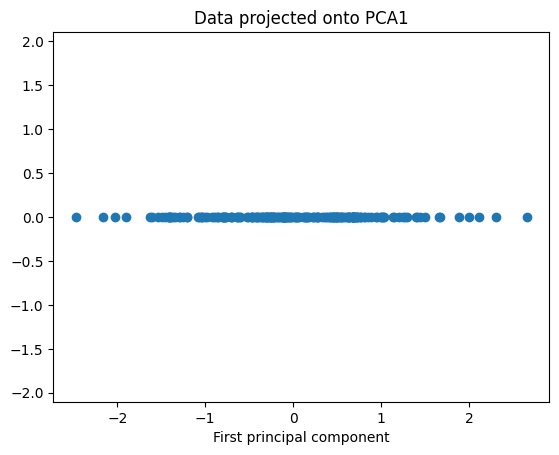

In [13]:
plt.scatter(X_pca, np.zeros(X_pca.shape))
plt.axis('equal');
plt.xlabel('First principal component')
plt.title('Data projected onto PCA1');

### Return to original space

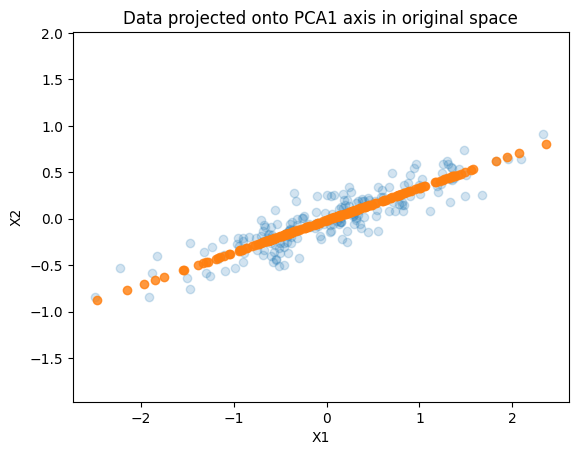

In [14]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data projected onto PCA1 axis in original space');

## Example: PCA on breast cancer dataset

Introduction to Machine Learning with Python [Chapter 3.4.1](https://github.com/amueller/introduction_to_ml_with_python/blob/master/03-unsupervised-learning.ipynb)

In [15]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

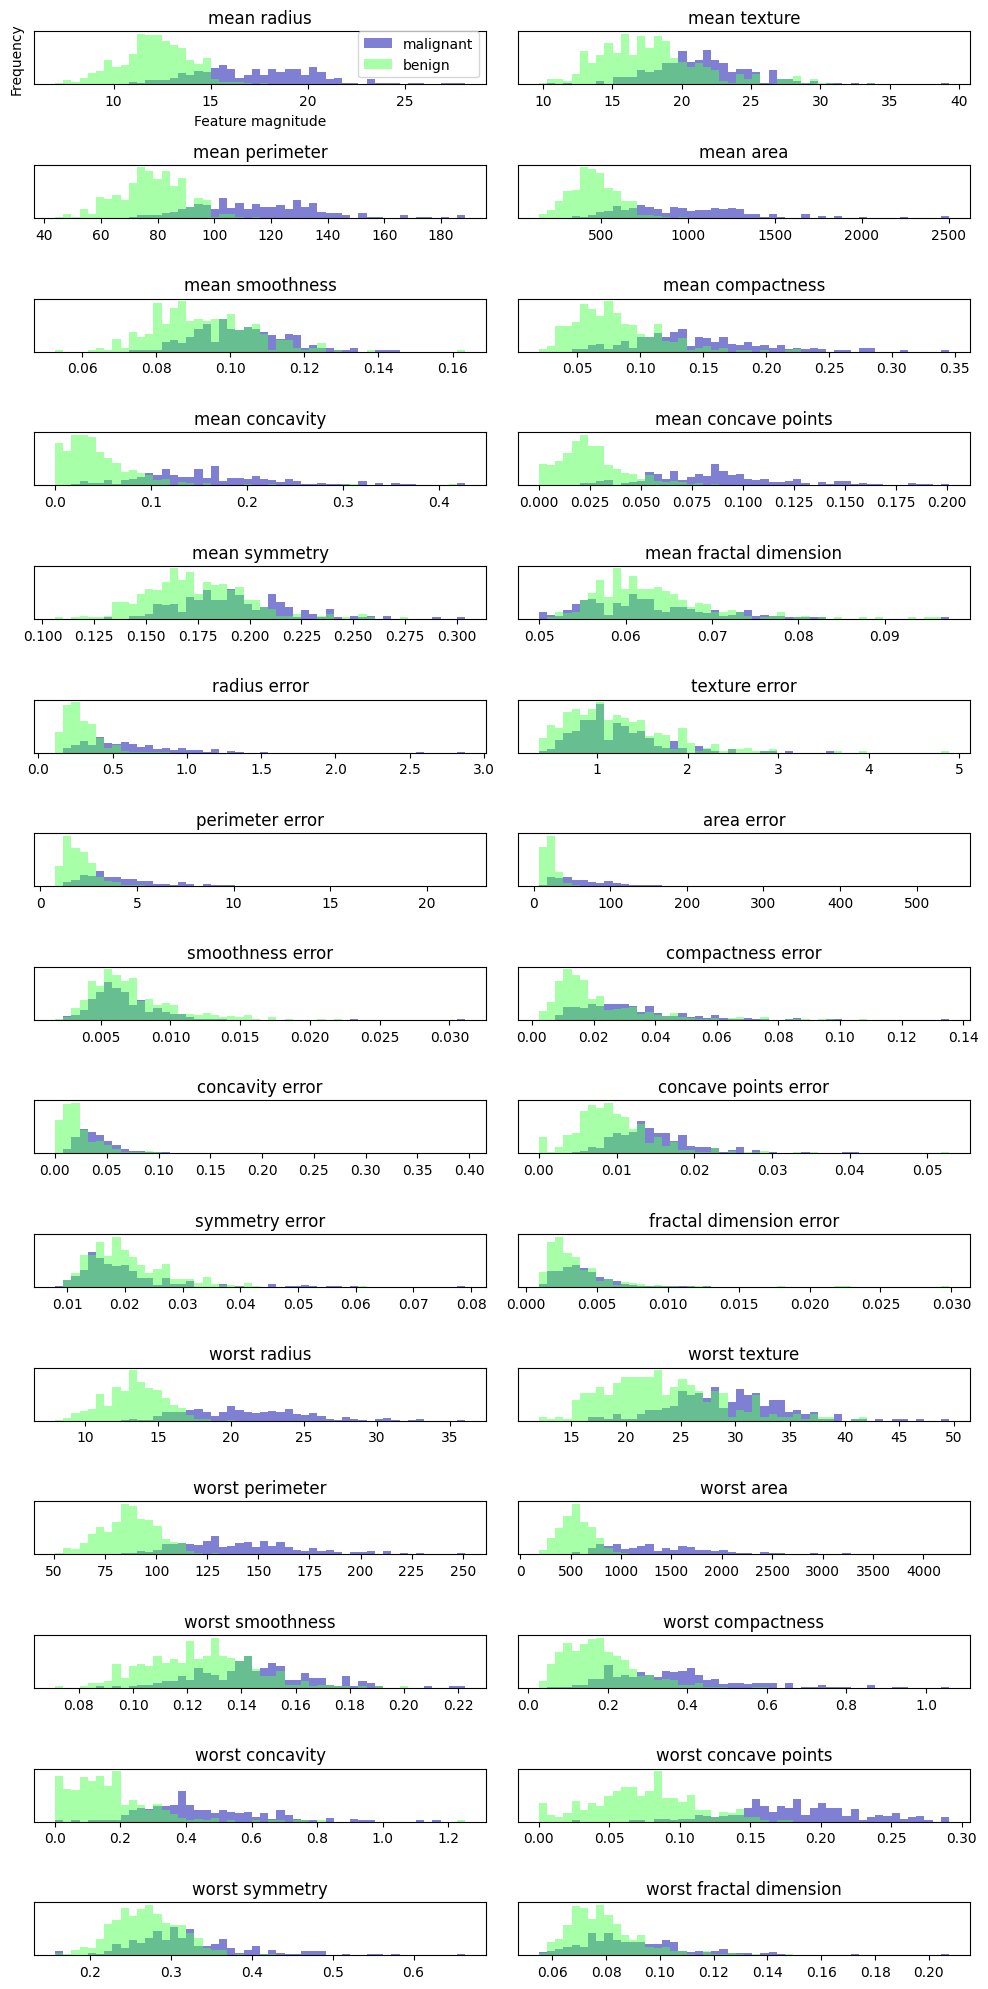

In [16]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

### PCA with 2 components for visualization

Original shape: (569, 30)
Reduced shape: (569, 2)


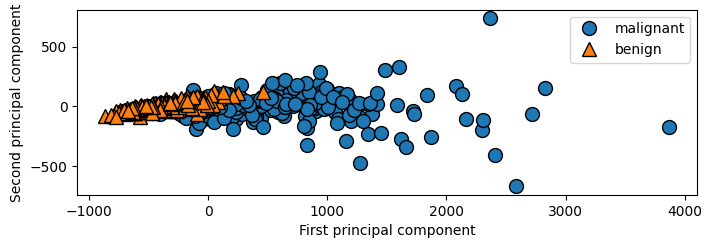

In [17]:
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(cancer.data)

# transform data onto the first two principal components
X_pca = pca.transform(cancer.data)
print("Original shape: {}".format(str(cancer.data.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

### Scaling features
Since these features are on different scales, it is likely that features with large variances (worst area) will dominate the first principal component.



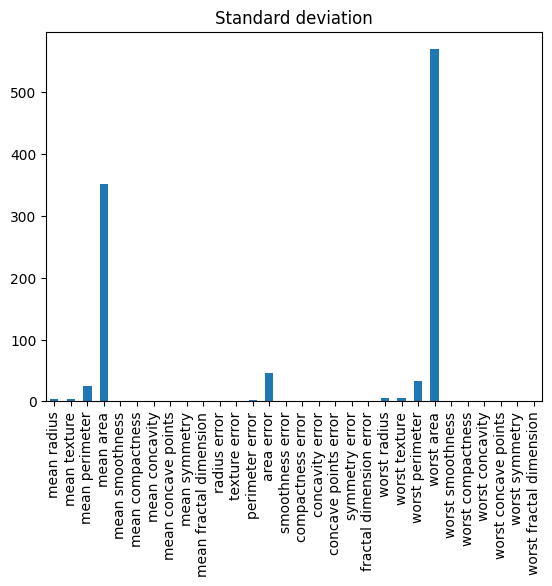

In [18]:
pd.DataFrame(cancer.data.std(axis=0), index=cancer.feature_names).plot.bar(legend=False);
plt.title('Standard deviation');

Applying a `StandardScaler` will bring all features onto a standard scale.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

### PCA with 2 components for visualization - scaled

Original shape: (569, 30)
Reduced shape: (569, 2)


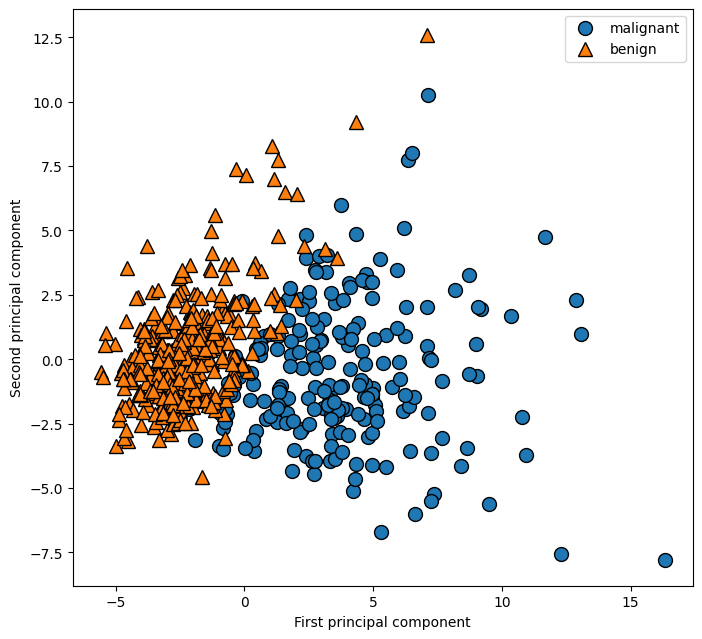

In [20]:
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

### Plotting PCA component axes (loadings)

In [21]:
print("PCA component axes shape: {}".format(pca.components_.shape))

PCA component axes shape: (2, 30)


In [22]:
print("PCA component axes:\n{}".format(pca.components_))

PCA component axes:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Create a bar plot of the principal component axes (loadings). These are the weights that will be used to combine the original features when transformed/projected.

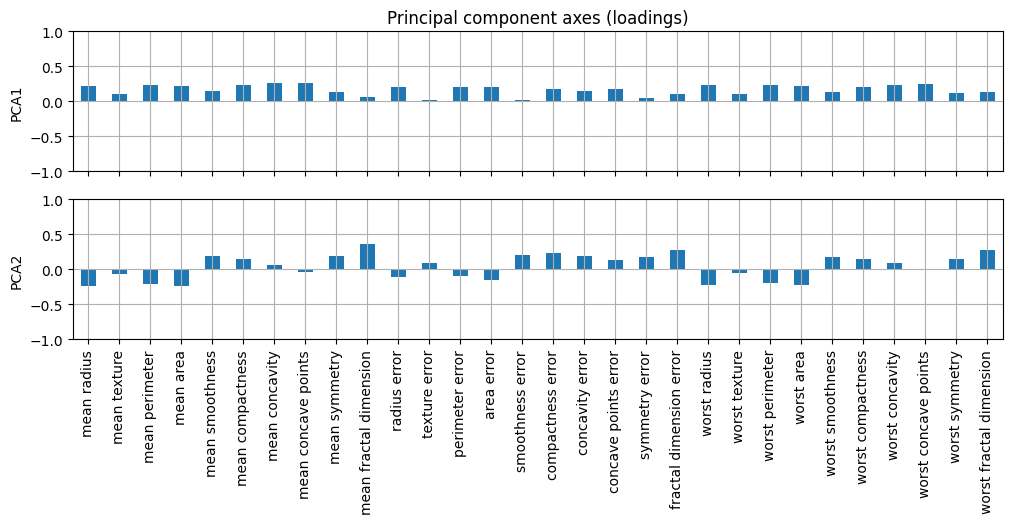

In [23]:
p_components = pd.DataFrame(pca.components_, columns=cancer.feature_names)
f, axs = plt.subplots(p_components.shape[0], 1, figsize=(12,4),sharex=True)
for i, ax in enumerate(axs):
    p_components.loc[i,:].plot.bar(ax=ax)
    ax.set_ylabel('PCA{}'.format(i+1))
    ax.set_ylim([-1,1])
    ax.grid(True)
axs[0].set_title('Principal component axes (loadings)');

In order to interpret more easily, a heat map of the principal component axes (loadings) might help

Text(0, 0.5, 'Principal component axes')

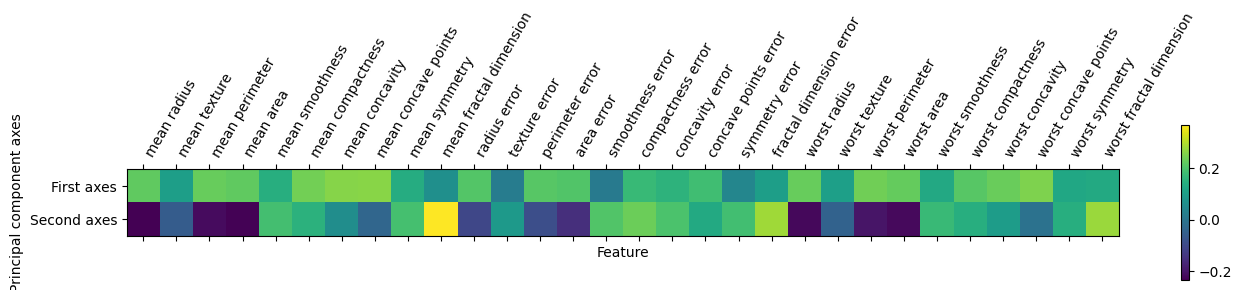

In [24]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First axes", "Second axes"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal component axes")

We are looking at the principal component axes using the scaled data. The first component seems to average most of the features, only some error features are close to zero. In the second component, there are positive and negative contributions.

Retry the plot using the unscaled data. You should find that only a few features contribute to the largest two variance directions.

### Plotting explained variance 

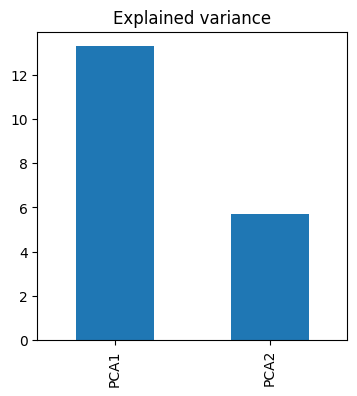

In [25]:
ax = pd.DataFrame(pca.explained_variance_, index=['PCA1', 'PCA2']).plot.bar(legend=False, figsize=(4,4))
ax.set_title('Explained variance');

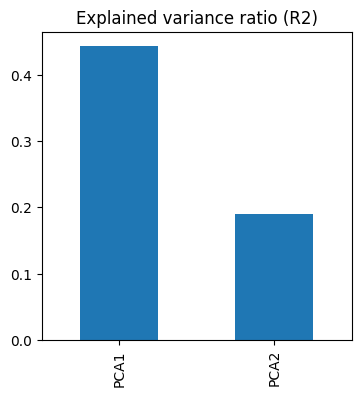

In [26]:
ax = pd.DataFrame(pca.explained_variance_ratio_, index=['PCA1', 'PCA2']).plot.bar(legend=False, figsize=(4,4))
ax.set_title('Explained variance ratio (R2)');

### Looking at how much variance is explained by increasing number of PCs

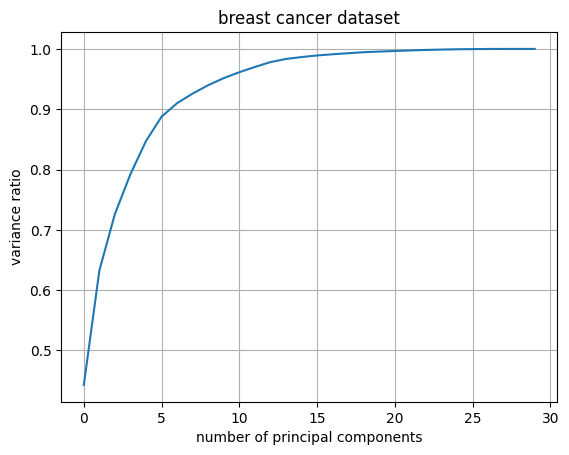

In [27]:
pca_all = PCA()
pca_all.fit(X_scaled)
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('number of principal components')
plt.ylabel('variance ratio')
plt.title('breast cancer dataset')
plt.grid(True)

This is often used to decide how many PCs to keep: As many PCs as are needed to explain, say 95% of the total variance.

The more components you need to explain significant variance, the greater the chance that the data would benefit from non-linear methods.